In [1]:
import numpy as np
import pandas as pd
import math
from datetime import datetime, timedelta
#from datetime import timedelta  ## use this to increment targ by 1 year!!!!
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
#import random

import sys
import os
os.chdir('C:/BankRisk')

In [2]:
grp = 'grpTotUSx00'
#grp = 'grpTotUSx18'
#grp = 'grpC18x00'

In [3]:
## select time period: 2001-2014, 2001-2007, 2008-2014 (14y, 7y, 7y)
#r0 = '2001_2007'
r0 = '2001_2010'
#r0 = '2001_2014'

ra = int(r0[0:4])
rb = int(r0[-4:])
r0, ra, rb

('2001_2010', 2001, 2010)

In [4]:
dn = pd.read_csv('NIMdata_FDIC_'+grp+'_exp.csv',index_col=0,parse_dates=True)
#'NIMdata_FDIC_grpTotUSx00_exp.csv'
dn.head(2)

Grp   nbr       eTotAst      eTangEq         eDDA  \
AsOf                                                                    
2001-03-31  grpTotUSx00  8857  6.619299e+09  474642337.0  735630015.0   
2001-06-30  grpTotUSx00  8790  6.670875e+09  482117312.0  767738647.0   

             qyNetII   qyTotII   qyTotLn      qyRE      qyCI     ...       \
AsOf                                                             ...        
2001-03-31  3.692046  7.841322  8.825734  8.458727  8.714799     ...        
2001-06-30  3.727612  7.347639  8.293801  7.955809  8.165959     ...        

                  aOLbIB    aFF_TA        aCsmr       aSavNow           aCD  \
AsOf                                                                          
2001-03-31  1.123344e+09 -1.149463  565178660.0  1.658162e+09  1.480339e+09   
2001-06-30  1.143565e+09 -1.166986  572302418.0  1.731745e+09  1.474806e+09   

            rNIM       aLnLsPc        aAstPc       aLiabPc       netDDA  
AsOf                                                                     
2001-03-31   NaN  4.017461e+09  5.863822e+09  5.672909e+09  451900692.0  
2001-06-30   NaN  4.052875e+09  5.935800e+09  5.777495e+09  443925675.0  

[2 rows x 77 columns]

In [5]:
len(dn.columns)

77

In [6]:
dn.columns

Index(['Grp', 'nbr', 'eTotAst', 'eTangEq', 'eDDA', 'qyNetII', 'qyTotII',
       'qyTotLn', 'qyRE', 'qyCI', 'qyCard', 'qyOthCsmr', 'qyOthLnLs', 'qyDFIB',
       'qyTreas', 'qyMBS', 'qyOthSec', 'qyFFS', 'qyOAstIB', 'qyTotLnLs',
       'qyTotSec', 'qrTotIE', 'qrNOW', 'qrSav', 'qrCDun', 'qrCDov', 'qrFFP',
       'qrBorr', 'qrOLbIB', 'qrDepIB', 'qrFDepIB', 'qyNIM', 'qyCsmr',
       'qrSavNow', 'qrCD', 'aTotAst', 'aDLn', 'aSFR', 'aRE', 'aTotRE', 'aAg',
       'aCI', 'aCard', 'aOthCsmr', 'aFLn', 'aLeas', 'aTrad', 'aDFIB', 'aTreas',
       'aMBS', 'aOSec', 'aFFS', 'aTotLn', 'aTotLnLs', 'aOthLnLs', 'aTotSec',
       'aOAstIB', 'aEarnAst', 'aNOW', 'aSav', 'aCDun', 'aCDov', 'aDDepIB',
       'aFDepIB', 'aFFP', 'aBorr', 'aDepIB', 'aOLbIB', 'aFF_TA', 'aCsmr',
       'aSavNow', 'aCD', 'rNIM', 'aLnLsPc', 'aAstPc', 'aLiabPc', 'netDDA'],
      dtype='object')

In [7]:
#dm = pd.read_csv('yldreg_3mat_bestdur_FDIC_'+grp+'_'+r0+'_10y.csv',index_col=0)
dm = pd.read_csv('yldreg_3mataltbest_FDIC_'+grp+'_'+r0+'_exp.csv',index_col=0)
dm.head()

grp      prod mt1  mt2  mt3   mx1   mx2       dur       spd  \
0  grpTotUSx00       DDA  r0   r1  r48  0.00  0.15  1.656066 -4.256987   
2  grpTotUSx00     Prime  r0   r1  r24  0.75  0.25  0.010417  3.030337   
4  grpTotUSx00      qrCD  r0  r12  r48  0.20  0.35  1.061465 -0.285886   
6  grpTotUSx00  qrFDepIB  r0   r1  r48  0.55  0.15  0.588538 -0.661015   
8  grpTotUSx00   qrOLbIB  r0   r1  r36  0.75  0.00  0.372170  0.879713   

         sd  lng  lng2 bst     dur_1      sd_1       slp    prod_1      slpn  
0  0.761571  r48    48   x  1.271627  1.018613 -0.668616       DDA -1.043422  
2  0.056925   r1     1   x  0.000000  0.094728 -3.629123     Prime -3.629123  
4  0.194878  r48    48   x  1.033209  0.221749 -0.951013      qrCD -1.944287  
6  0.209809  r48    48   x  0.521038  0.249425 -0.586899  qrFDepIB -1.159982  
8  0.214556  r36    36   x  0.306069  0.272176 -0.871712   qrOLbIB -1.339397

In [8]:
dm

grp       prod mt1  mt2  mt3   mx1   mx2       dur       spd  \
0   grpTotUSx00        DDA  r0   r1  r48  0.00  0.15  1.656066 -4.256987   
2   grpTotUSx00      Prime  r0   r1  r24  0.75  0.25  0.010417  3.030337   
4   grpTotUSx00       qrCD  r0  r12  r48  0.20  0.35  1.061465 -0.285886   
6   grpTotUSx00   qrFDepIB  r0   r1  r48  0.55  0.15  0.588538 -0.661015   
8   grpTotUSx00    qrOLbIB  r0   r1  r36  0.75  0.00  0.372170  0.879713   
11  grpTotUSx00   qrSavNow  r0   r1  r48  0.15  0.25  1.174993 -2.520595   
13  grpTotUSx00       qyCI  r0   r1  r48  0.60  0.00  0.776384  3.042356   
15  grpTotUSx00     qyCsmr  r0   r1  r36  0.20  0.00  1.190943  5.377148   
17  grpTotUSx00   qyOAstIB  r0   r1  r48  0.25  0.40  0.696003 -0.451823   
19  grpTotUSx00  qyOthLnLs  r0   r6  r48  0.35  0.10  1.092528  2.042832   
21  grpTotUSx00       qyRE  r0   r1  r36  0.40  0.00  0.893207  2.650664   
22  grpTotUSx00   qyTotSec  r0   r1  r36  0.20  0.00  1.190943  0.658972   

          sd  lng  lng2 bst     dur_1      sd_1       slp     prod_1      slpn  
0   0.761571  r48    48   x  1.271627  1.018613 -0.668616        DDA -1.043422  
2   0.056925   r1     1   x  0.000000  0.094728 -3.629123      Prime -3.629123  
4   0.194878  r48    48   x  1.033209  0.221749 -0.951013       qrCD -1.944287  
6   0.209809  r48    48   x  0.521038  0.249425 -0.586899   qrFDepIB -1.159982  
8   0.214556  r36    36   x  0.306069  0.272176 -0.871712    qrOLbIB -1.339397  
11  0.365478  r48    48   x  0.895291  0.528753 -0.583745   qrSavNow -1.157662  
13  0.418404  r48    48   x  0.595471  0.537307 -0.657242       qyCI -0.881045  
15  0.688353  r36    36   x  0.918208  0.950620 -0.961621     qyCsmr -1.038801  
17  0.230264  r48    48   x  0.605888  0.295218 -0.720795   qyOAstIB -1.260312  
19  0.343466  r48    48   x  1.089284  0.346928 -1.067387  qyOthLnLs -1.443629  
21  0.433659  r36    36   x  0.714162  0.690836 -1.436375       qyRE -1.436375  
22  0.419593  r36    36   x  0.969220  0.732413 -1.410855   qyTotSec -1.410855

In [9]:
ls = pd.read_csv('LibSwap_LongHist_30y_201512.csv',index_col=0,parse_dates=True)
ls.head(2)

F1d       L1m       L3m       L6m  L12m       S1y       S2y  \
Date                                                                       
1965-01-01  3.90  4.236603  4.573205  4.713205   NaN  4.713205  4.773205   
1965-02-01  3.98  4.336603  4.693205  4.773205   NaN  4.823205  4.838205   

                 S3y       S4y       S5y       S7y      S10y      S30y  Prime  \
Date                                                                            
1965-01-01  4.793205  4.828205  4.863205  4.839718  4.966538  4.927428    4.5   
1965-02-01  4.843205  4.878205  4.913205  4.865718  4.986538  4.947241    4.5   

            L9m  
Date             
1965-01-01  NaN  
1965-02-01  NaN

In [10]:
# calc rolling means, then resample('Q')
#df3a['x'] = df3z.groupby(['Grp','IDRSSD'])['qCashExp'].apply(pd.rolling_sum, 4, min_periods=4) 
ls['r0'] = ls['F1d'] * 365/360
ls['r1'] = ls['L1m'] * 365/360
ls['r3'] = pd.rolling_mean(ls['L3m'],3, min_periods=3) * 365/360
ls['r6'] = pd.rolling_mean(ls['L6m'],6, min_periods=6) * 365/360
ls['r12'] = pd.rolling_mean(ls['S1y'],12, min_periods=12)
ls['r24'] = pd.rolling_mean(ls['S2y'],24, min_periods=24)
ls['r36'] = pd.rolling_mean(ls['S3y'],36, min_periods=36)
ls['r48'] = pd.rolling_mean(ls['S4y'],48, min_periods=48)
ls['r60'] = pd.rolling_mean(ls['S5y'],60, min_periods=60)
ls['r84'] = pd.rolling_mean(ls['S7y'],84, min_periods=84)
ls['r120'] = pd.rolling_mean(ls['S10y'],120, min_periods=120)
ls['r360'] = pd.rolling_mean(ls['S30y'],360, min_periods=360)
ls.tail(3)

F1d      L1m      L3m      L6m     L12m   S1y   S2y   S3y   S4y  \
Date                                                                           
2015-10-01  0.12  0.19451  0.32136  0.52843  0.83787  0.49  0.75  0.99  1.21   
2015-11-01  0.12  0.20845  0.37097  0.60637  0.93437  0.64  0.95  1.22  1.43   
2015-12-01  0.24  0.35231  0.53324  0.76383  1.08414  0.78  1.08  1.32  1.51   

             S5y    ...           r3        r6       r12       r24       r36  \
Date                ...                                                        
2015-10-01  1.40    ...     0.328929  0.490590  0.475833  0.700833  0.923333   
2015-11-01  1.60    ...     0.345885  0.522660  0.500833  0.723750  0.944444   
2015-12-01  1.66    ...     0.414197  0.577423  0.531667  0.750833  0.968056   

                 r48       r60       r84      r120      r360  
Date                                                          
2015-10-01  1.134583  1.499667  2.260833  3.406333  6.224912  
2015-11-01  1.142708  1.499500  2.239881  3.381917  6.202003  
2015-12-01  1.152292  1.491667  2.232262  3.358167  6.180567  

[3 rows x 27 columns]

In [12]:
lsq = ls.resample('Q').mean()
lsq.tail(3)

F1d       L1m       L3m       L6m      L12m       S1y  \
Date                                                                     
2015-06-30  0.123333  0.183627  0.279403  0.420283  0.733947  0.490000   
2015-09-30  0.136667  0.195323  0.314193  0.506150  0.824980  0.540000   
2015-12-31  0.160000  0.251757  0.408523  0.632877  0.952127  0.636667   

                 S2y       S3y       S4y       S5y    ...           r3  \
Date                                                  ...                
2015-06-30  0.860000  1.196667  1.456667  1.670000    ...     0.277658   
2015-09-30  0.880000  1.186667  1.440000  1.653333    ...     0.303004   
2015-12-31  0.926667  1.176667  1.383333  1.553333    ...     0.363004   

                  r6       r12       r24       r36       r48       r60  \
Date                                                                     
2015-06-30  0.388677  0.389167  0.625000  0.837222  1.110139  1.515000   
2015-09-30  0.446059  0.445556  0.675278  0.891296  1.122778  1.501056   
2015-12-31  0.530224  0.502778  0.725139  0.945278  1.143194  1.496944   

                 r84      r120      r360  
Date                                      
2015-06-30  2.401071  3.507111  6.344768  
2015-09-30  2.316587  3.451056  6.273378  
2015-12-31  2.244325  3.382139  6.202494  

[3 rows x 27 columns]

In [13]:
lsq2 = lsq['2001':'2014']
lsq2.tail(2)

F1d       L1m       L3m       L6m      L12m       S1y       S2y  \
Date                                                                           
2014-09-30  0.09  0.154837  0.234283  0.329303  0.563903  0.330000  0.710000   
2014-12-31  0.10  0.157127  0.236283  0.331147  0.572190  0.356667  0.753333   

                 S3y       S4y       S5y    ...           r3        r6  \
Date                                        ...                          
2014-09-30  1.160000  1.540000  1.826667    ...     0.235879  0.331246   
2014-12-31  1.166667  1.493333  1.740000    ...     0.237383  0.332449   

                 r12       r24       r36       r48       r60       r84  \
Date                                                                     
2014-09-30  0.292222  0.473194  0.728704  1.138958  1.662056  2.657063   
2014-12-31  0.300833  0.515694  0.761852  1.154375  1.616000  2.558770   

                r120      r360  
Date                            
2014-09-30  3.684611  6.586124  
2014-12-31  3.632278  6.505476  

[2 rows x 27 columns]

In [14]:
len(lsq2)

56

In [15]:
lsq.to_csv('LS_ladders.csv')

In [16]:
lsq[['F1d','r0']].tail()

F1d        r0
Date                          
2014-12-31  0.100000  0.101389
2015-03-31  0.110000  0.111528
2015-06-30  0.123333  0.125046
2015-09-30  0.136667  0.138565
2015-12-31  0.160000  0.162222

In [17]:
dm.reset_index(drop=True, inplace=True)
dm

grp       prod mt1  mt2  mt3   mx1   mx2       dur       spd  \
0   grpTotUSx00        DDA  r0   r1  r48  0.00  0.15  1.656066 -4.256987   
1   grpTotUSx00      Prime  r0   r1  r24  0.75  0.25  0.010417  3.030337   
2   grpTotUSx00       qrCD  r0  r12  r48  0.20  0.35  1.061465 -0.285886   
3   grpTotUSx00   qrFDepIB  r0   r1  r48  0.55  0.15  0.588538 -0.661015   
4   grpTotUSx00    qrOLbIB  r0   r1  r36  0.75  0.00  0.372170  0.879713   
5   grpTotUSx00   qrSavNow  r0   r1  r48  0.15  0.25  1.174993 -2.520595   
6   grpTotUSx00       qyCI  r0   r1  r48  0.60  0.00  0.776384  3.042356   
7   grpTotUSx00     qyCsmr  r0   r1  r36  0.20  0.00  1.190943  5.377148   
8   grpTotUSx00   qyOAstIB  r0   r1  r48  0.25  0.40  0.696003 -0.451823   
9   grpTotUSx00  qyOthLnLs  r0   r6  r48  0.35  0.10  1.092528  2.042832   
10  grpTotUSx00       qyRE  r0   r1  r36  0.40  0.00  0.893207  2.650664   
11  grpTotUSx00   qyTotSec  r0   r1  r36  0.20  0.00  1.190943  0.658972   

          sd  lng  lng2 bst     dur_1      sd_1       slp     prod_1      slpn  
0   0.761571  r48    48   x  1.271627  1.018613 -0.668616        DDA -1.043422  
1   0.056925   r1     1   x  0.000000  0.094728 -3.629123      Prime -3.629123  
2   0.194878  r48    48   x  1.033209  0.221749 -0.951013       qrCD -1.944287  
3   0.209809  r48    48   x  0.521038  0.249425 -0.586899   qrFDepIB -1.159982  
4   0.214556  r36    36   x  0.306069  0.272176 -0.871712    qrOLbIB -1.339397  
5   0.365478  r48    48   x  0.895291  0.528753 -0.583745   qrSavNow -1.157662  
6   0.418404  r48    48   x  0.595471  0.537307 -0.657242       qyCI -0.881045  
7   0.688353  r36    36   x  0.918208  0.950620 -0.961621     qyCsmr -1.038801  
8   0.230264  r48    48   x  0.605888  0.295218 -0.720795   qyOAstIB -1.260312  
9   0.343466  r48    48   x  1.089284  0.346928 -1.067387  qyOthLnLs -1.443629  
10  0.433659  r36    36   x  0.714162  0.690836 -1.436375       qyRE -1.436375  
11  0.419593  r36    36   x  0.969220  0.732413 -1.410855   qyTotSec -1.410855

In [18]:
dn.head(2)

Grp   nbr       eTotAst      eTangEq         eDDA  \
AsOf                                                                    
2001-03-31  grpTotUSx00  8857  6.619299e+09  474642337.0  735630015.0   
2001-06-30  grpTotUSx00  8790  6.670875e+09  482117312.0  767738647.0   

             qyNetII   qyTotII   qyTotLn      qyRE      qyCI     ...       \
AsOf                                                             ...        
2001-03-31  3.692046  7.841322  8.825734  8.458727  8.714799     ...        
2001-06-30  3.727612  7.347639  8.293801  7.955809  8.165959     ...        

                  aOLbIB    aFF_TA        aCsmr       aSavNow           aCD  \
AsOf                                                                          
2001-03-31  1.123344e+09 -1.149463  565178660.0  1.658162e+09  1.480339e+09   
2001-06-30  1.143565e+09 -1.166986  572302418.0  1.731745e+09  1.474806e+09   

            rNIM       aLnLsPc        aAstPc       aLiabPc       netDDA  
AsOf                                                                     
2001-03-31   NaN  4.017461e+09  5.863822e+09  5.672909e+09  451900692.0  
2001-06-30   NaN  4.052875e+09  5.935800e+09  5.777495e+09  443925675.0  

[2 rows x 77 columns]

In [19]:
# NIM calcs: dn(balyld), dm(durmatsmixes), dl(ladders)

In [20]:
dl = lsq2.copy()

In [21]:
dn.head(2)

Grp   nbr       eTotAst      eTangEq         eDDA  \
AsOf                                                                    
2001-03-31  grpTotUSx00  8857  6.619299e+09  474642337.0  735630015.0   
2001-06-30  grpTotUSx00  8790  6.670875e+09  482117312.0  767738647.0   

             qyNetII   qyTotII   qyTotLn      qyRE      qyCI     ...       \
AsOf                                                             ...        
2001-03-31  3.692046  7.841322  8.825734  8.458727  8.714799     ...        
2001-06-30  3.727612  7.347639  8.293801  7.955809  8.165959     ...        

                  aOLbIB    aFF_TA        aCsmr       aSavNow           aCD  \
AsOf                                                                          
2001-03-31  1.123344e+09 -1.149463  565178660.0  1.658162e+09  1.480339e+09   
2001-06-30  1.143565e+09 -1.166986  572302418.0  1.731745e+09  1.474806e+09   

            rNIM       aLnLsPc        aAstPc       aLiabPc       netDDA  
AsOf                                                                     
2001-03-31   NaN  4.017461e+09  5.863822e+09  5.672909e+09  451900692.0  
2001-06-30   NaN  4.052875e+09  5.935800e+09  5.777495e+09  443925675.0  

[2 rows x 77 columns]

In [22]:
# calc FTP rates for each time period:
for i in np.arange(len(dm)):
  mt1=dm.ix[i]['mt1']
  mt2=dm.ix[i]['mt2']
  mt3=dm.ix[i]['mt3']
  mx1=dm.ix[i]['mx1']
  mx2=dm.ix[i]['mx2']
  mx3=1-mx1-mx2
  pr = 'f'+dm.ix[i]['prod']
  dn[pr] = dl[mt1]*mx1 + dl[mt2]*mx2 + dl[mt3]*mx3

dn['DDA'] = 0
dn['Prime'] = dl['Prime']

In [23]:
for i in np.arange(len(dm)):
  pr = dm.ix[i]['prod']
  fpr = 'f'+ pr
  spr = 's' + pr
  mlt = 1
  if 'qr' in pr: mlt = -1
  if pr == 'DDA': mlt = -1
  dn[spr] = (dn[pr] - dn[fpr]) * mlt

In [24]:
dm

grp       prod mt1  mt2  mt3   mx1   mx2       dur       spd  \
0   grpTotUSx00        DDA  r0   r1  r48  0.00  0.15  1.656066 -4.256987   
1   grpTotUSx00      Prime  r0   r1  r24  0.75  0.25  0.010417  3.030337   
2   grpTotUSx00       qrCD  r0  r12  r48  0.20  0.35  1.061465 -0.285886   
3   grpTotUSx00   qrFDepIB  r0   r1  r48  0.55  0.15  0.588538 -0.661015   
4   grpTotUSx00    qrOLbIB  r0   r1  r36  0.75  0.00  0.372170  0.879713   
5   grpTotUSx00   qrSavNow  r0   r1  r48  0.15  0.25  1.174993 -2.520595   
6   grpTotUSx00       qyCI  r0   r1  r48  0.60  0.00  0.776384  3.042356   
7   grpTotUSx00     qyCsmr  r0   r1  r36  0.20  0.00  1.190943  5.377148   
8   grpTotUSx00   qyOAstIB  r0   r1  r48  0.25  0.40  0.696003 -0.451823   
9   grpTotUSx00  qyOthLnLs  r0   r6  r48  0.35  0.10  1.092528  2.042832   
10  grpTotUSx00       qyRE  r0   r1  r36  0.40  0.00  0.893207  2.650664   
11  grpTotUSx00   qyTotSec  r0   r1  r36  0.20  0.00  1.190943  0.658972   

          sd  lng  lng2 bst     dur_1      sd_1       slp     prod_1      slpn  
0   0.761571  r48    48   x  1.271627  1.018613 -0.668616        DDA -1.043422  
1   0.056925   r1     1   x  0.000000  0.094728 -3.629123      Prime -3.629123  
2   0.194878  r48    48   x  1.033209  0.221749 -0.951013       qrCD -1.944287  
3   0.209809  r48    48   x  0.521038  0.249425 -0.586899   qrFDepIB -1.159982  
4   0.214556  r36    36   x  0.306069  0.272176 -0.871712    qrOLbIB -1.339397  
5   0.365478  r48    48   x  0.895291  0.528753 -0.583745   qrSavNow -1.157662  
6   0.418404  r48    48   x  0.595471  0.537307 -0.657242       qyCI -0.881045  
7   0.688353  r36    36   x  0.918208  0.950620 -0.961621     qyCsmr -1.038801  
8   0.230264  r48    48   x  0.605888  0.295218 -0.720795   qyOAstIB -1.260312  
9   0.343466  r48    48   x  1.089284  0.346928 -1.067387  qyOthLnLs -1.443629  
10  0.433659  r36    36   x  0.714162  0.690836 -1.436375       qyRE -1.436375  
11  0.419593  r36    36   x  0.969220  0.732413 -1.410855   qyTotSec -1.410855

In [25]:
alst = [x for x in dm['prod'] if 'qy' in x]
llst = [x for x in dm['prod'] if 'qr' in x] 
alst, llst

(['qyCI', 'qyCsmr', 'qyOAstIB', 'qyOthLnLs', 'qyRE', 'qyTotSec'],
 ['qrCD', 'qrFDepIB', 'qrOLbIB', 'qrSavNow'])

In [26]:
#
balst = ['aTotRE','aCI','aCsmr','aOthLnLs','aTotSec','aOAstIB','netDDA','aSavNow','aCD','aFDepIB','aOLbIB']
splst = ['sqyRE','sqyCI','sqyCsmr','sqyOthLnLs','sqyTotSec','sqyOAstIB','sDDA','sqrSavNow','sqrCD','sqrFDepIB','sqrOLbIB']
#ablst = ['a' + x[2:] for x in alst]
#ablst = ['aTotRE' if x=='aRE' else x for x in ablst]
#lblst = ['a' + x[2:] for x in llst] + ['netDDA']
balst, splst

(['aTotRE',
  'aCI',
  'aCsmr',
  'aOthLnLs',
  'aTotSec',
  'aOAstIB',
  'netDDA',
  'aSavNow',
  'aCD',
  'aFDepIB',
  'aOLbIB'],
 ['sqyRE',
  'sqyCI',
  'sqyCsmr',
  'sqyOthLnLs',
  'sqyTotSec',
  'sqyOAstIB',
  'sDDA',
  'sqrSavNow',
  'sqrCD',
  'sqrFDepIB',
  'sqrOLbIB'])

In [27]:
sum(dn.ix[0][balst][0:6]),sum(dn.ix[0][balst][6:]), dn.ix[0]['eTangEq']

(5863821815.0, 5389179478.0, 474642337.0)

In [28]:
dn.ix[0]['aEarnAst']

5863821815.0

In [29]:
dn.ix[0][balst][6:]

netDDA     4.51901e+08
aSavNow    1.65816e+09
aCD        1.48034e+09
aFDepIB    6.75434e+08
aOLbIB     1.12334e+09
Name: 2001-03-31 00:00:00, dtype: object

In [30]:
sum(dn.ix[0][['netDDA','aSavNow','aCD','aFDepIB','aOLbIB','eTangEq']])

5863821815.0

In [31]:
dn.columns[:65],dn.columns[65:]

(Index(['Grp', 'nbr', 'eTotAst', 'eTangEq', 'eDDA', 'qyNetII', 'qyTotII',
        'qyTotLn', 'qyRE', 'qyCI', 'qyCard', 'qyOthCsmr', 'qyOthLnLs', 'qyDFIB',
        'qyTreas', 'qyMBS', 'qyOthSec', 'qyFFS', 'qyOAstIB', 'qyTotLnLs',
        'qyTotSec', 'qrTotIE', 'qrNOW', 'qrSav', 'qrCDun', 'qrCDov', 'qrFFP',
        'qrBorr', 'qrOLbIB', 'qrDepIB', 'qrFDepIB', 'qyNIM', 'qyCsmr',
        'qrSavNow', 'qrCD', 'aTotAst', 'aDLn', 'aSFR', 'aRE', 'aTotRE', 'aAg',
        'aCI', 'aCard', 'aOthCsmr', 'aFLn', 'aLeas', 'aTrad', 'aDFIB', 'aTreas',
        'aMBS', 'aOSec', 'aFFS', 'aTotLn', 'aTotLnLs', 'aOthLnLs', 'aTotSec',
        'aOAstIB', 'aEarnAst', 'aNOW', 'aSav', 'aCDun', 'aCDov', 'aDDepIB',
        'aFDepIB', 'aFFP'],
       dtype='object'),
 Index(['aBorr', 'aDepIB', 'aOLbIB', 'aFF_TA', 'aCsmr', 'aSavNow', 'aCD',
        'rNIM', 'aLnLsPc', 'aAstPc', 'aLiabPc', 'netDDA', 'fDDA', 'fPrime',
        'fqrCD', 'fqrFDepIB', 'fqrOLbIB', 'fqrSavNow', 'fqyCI', 'fqyCsmr',
        'fqyOAstIB', 'fqyOthLnL

In [32]:
[x for x in dn.columns if 'TotII' in x]

['qyTotII']

In [43]:
balst

['aTotRE',
 'aCI',
 'aCsmr',
 'aOthLnLs',
 'aTotSec',
 'aOAstIB',
 'netDDA',
 'aSavNow',
 'aCD',
 'aFDepIB',
 'aOLbIB']

In [33]:
ba = balst # 0-5 ast, 6-10 liab (0-3 TotLnLs) (6-9 TotDep)
sp = splst # 0-5 ast, 6-10 liab

In [34]:
# spread NIM & mismatch NIM calcs:
dn['sNIM'] = dn.apply(lambda x: (x[ba[0]]*x[sp[0]]+x[ba[1]]*x[sp[1]]+x[ba[2]]*x[sp[2]]+x[ba[3]]*x[sp[3]]+\
                     x[ba[4]]*x[sp[4]]+x[ba[5]]*x[sp[5]]+x[ba[6]]*x[sp[6]]+x[ba[7]]*x[sp[7]]+\
                     x[ba[8]]*x[sp[8]]+x[ba[9]]*x[sp[9]]+x[ba[10]]*x[sp[10]])/x['aEarnAst'],axis=1)
dn['mNIM'] = dn.apply(lambda x: x['qyNIM'] - x['sNIM'],axis=1)

In [45]:
dn['sTotII'] = dn.apply(lambda x: (x[ba[0]]*x[sp[0]]+x[ba[1]]*x[sp[1]]+x[ba[2]]*x[sp[2]]+x[ba[3]]*x[sp[3]]+\
                     x[ba[4]]*x[sp[4]]+x[ba[5]]*x[sp[5]])/x['aEarnAst'],axis=1)
dn['fTotII'] = dn['qyTotII'] - dn['sTotII']
dn['sTotIE'] = dn.apply(lambda x: (x[ba[6]]*x[sp[6]]+x[ba[7]]*x[sp[7]]+x[ba[8]]*x[sp[8]]+x[ba[9]]*x[sp[9]]+\
                     x[ba[10]]*x[sp[10]])/x['aEarnAst'],axis=1)
dn['fTotIE'] = dn['qrTotIE'] + dn['sTotIE']

In [46]:
dn['sTotLnLs'] = dn.apply(lambda x: (x[ba[0]]*x[sp[0]]+x[ba[1]]*x[sp[1]]+x[ba[2]]*x[sp[2]]+x[ba[3]]*x[sp[3]])/\
                        x['aTotLnLs'],axis=1)
dn['fTotLnLs'] = dn.apply(lambda x: x['qyTotLnLs'] - x['sTotLnLs'],axis=1)
dn['aTotDep'] = dn['aDDepIB'] + dn['aFDepIB'] + dn['netDDA']
dn['sTotDep'] = dn.apply(lambda x: (x['sDDA']*x['netDDA']+x['sqrCD']*x['aCD']+x['sqrSavNow']*x['aSavNow']+\
                                   x['sqrFDepIB']*x['aFDepIB'])/x['aTotDep'],axis=1)
dn['fTotDep'] = dn.apply(lambda x: (x['fDDA']*x['netDDA']+x['fqrCD']*x['aCD']+x['fqrSavNow']*x['aSavNow']+\
                                   x['fqrFDepIB']*x['aFDepIB'])/x['aTotDep'],axis=1)
dn['qrTotDep'] = dn['fTotDep']-dn['sTotDep']

In [73]:
dnorig = dn.copy()
dn = dn.ix[:'2014']
dn.tail()

Grp   nbr       eTotAst       eTangEq          eDDA  \
AsOf                                                                      
2013-12-31  grpTotUSx00  6877  1.474191e+10  1.289242e+09  2.716202e+09   
2014-03-31  grpTotUSx00  6794  1.492093e+10  1.319210e+09  2.755308e+09   
2014-06-30  grpTotUSx00  6722  1.518345e+10  1.353202e+09  2.878036e+09   
2014-09-30  grpTotUSx00  6651  1.535919e+10  1.365736e+09  2.909878e+09   
2014-12-31  grpTotUSx00  6570  1.556402e+10  1.383678e+09  2.954644e+09   

             qyNetII   qyTotII   qyTotLn      qyRE      qyCI    ...     \
AsOf                                                            ...      
2013-12-31  3.187783  3.562371  4.905252  4.382857  4.023224    ...      
2014-03-31  3.114771  3.471689  4.766320  4.318104  3.905202    ...      
2014-06-30  3.101547  3.453468  4.729034  4.313036  3.837347    ...      
2014-09-30  3.090025  3.432149  4.722578  4.267478  3.803848    ...      
2014-12-31  3.045000  3.372199  4.693079  4.230186  3.819276    ...      

            fTotLnLs       aTotDep   sTotDep   fTotDep  qrTotDep    sTotII  \
AsOf                                                                         
2013-12-31  0.580170  1.076245e+10  0.490727  0.779927  0.289200  2.975643   
2014-03-31  0.546483  1.082116e+10  0.460795  0.738361  0.277566  2.918378   
2014-06-30  0.532007  1.092700e+10  0.438636  0.710834  0.272198  2.916483   
2014-09-30  0.535335  1.113709e+10  0.436835  0.705727  0.268892  2.891510   
2014-12-31  0.556303  1.134967e+10  0.465795  0.719336  0.253541  2.811473   

              fTotII    sTotIE    fTotIE      cNIM  
AsOf                                                
2013-12-31  0.586728  0.281949  0.656537  3.187783  
2014-03-31  0.553312  0.262716  0.619635  3.114771  
2014-06-30  0.536985  0.244629  0.596549  3.101547  
2014-09-30  0.540639  0.251036  0.593160  3.090025  
2014-12-31  0.560726  0.279387  0.606585  3.045000  

[5 rows x 116 columns]

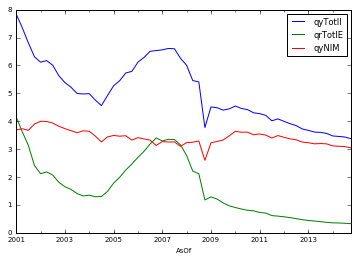

In [74]:
dn[['qyTotII','qrTotIE','qyNIM']].plot()

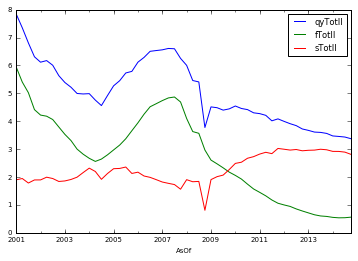

In [75]:
dn[['qyTotII','fTotII','sTotII']].plot()

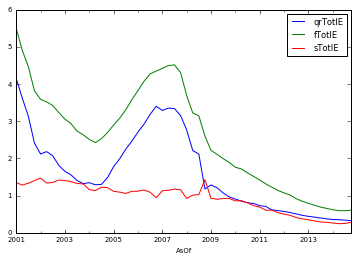

In [76]:
dn[['qrTotIE','fTotIE','sTotIE']].plot()

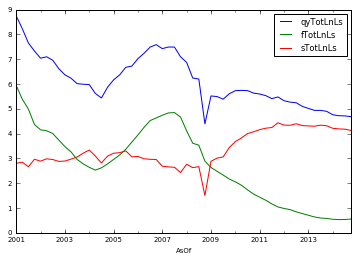

In [77]:
dn[['qyTotLnLs','fTotLnLs','sTotLnLs']].plot()

In [78]:
dn[['qyTotSec','fqyTotSec','sqyTotSec']].plot()

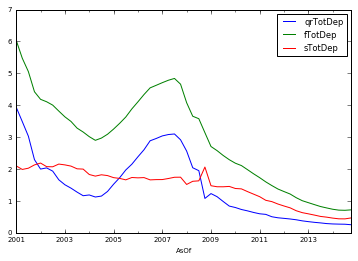

In [79]:
dn[['qrTotDep','fTotDep','sTotDep']].plot()

In [80]:
l1 = ['qyTotII','qyTotII','qrTotIE','qyTotLnLs','qyTotSec','qrTotDep']
l2 = ['qrTotIE','fTotII','fTotIE','fTotLnLs','fqyTotSec','fTotDep']
l3 = ['qyNIM','sTotII','sTotIE','sTotLnLs','sqyTotSec','sTotDep']
l1a = ['YldEA','Yld_EA','Rt_FS','Yld_LnLs','Yld_Sec','Rt_Dep']
l2a = ['CstFS','FTP_EA','FTP_FS','FTP_LnLs','FTP_Sec','FTP_Dep']
l3a = ['NIM','Spd_EA','Spd_FS','Spd_LnLs','Spd_Sec','Spd_Dep']
lt = ['Net Interest Margin','Earning Assets','Funding Sources','Loans & Leases','Total Securities','Total Deposits']
x = list(dn.index) # for x-axis values

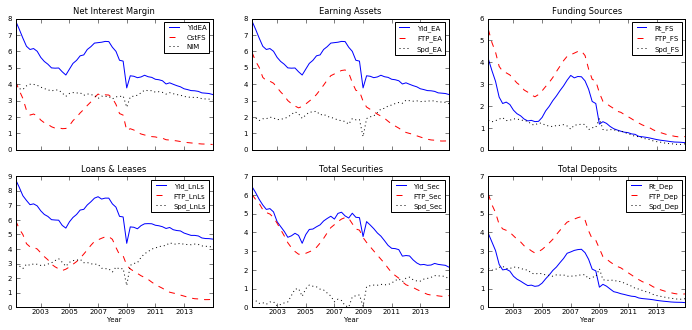

In [81]:
plt.rcParams.update({'font.size': 7})
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2, plSize[1]*2) )  ## double width, single height

for i in np.arange(6):
  plt.subplot(3, 3, i+1)
  plt.plot(x,dn[l1[i]],c='b',ls='-',label=l1a[i])
  plt.plot(x,dn[l2[i]],c='r',ls='--',label=l2a[i])
  plt.plot(x,dn[l3[i]],c='k',ls=':',label=l3a[i])

  plt.ylim(ymin=0)
  plt.title(lt[i])
  plt.legend(loc=0,fontsize=7)

  if i < 3:
    labl = 'off'
    plt.xlabel('',labelpad=2)
  else:
    labl = 'on'
    plt.xlabel('Year',labelpad=2)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    pad = 1.4,        # move labels closer to frame
    labelsize = 7,    # decrease font size of year labels
    labelbottom=labl) # labels along the bottom edge are off

plt.savefig('NIM_decomp_'+grp+'_'+r0+'.png', dpi=400, bbox_inches='tight')
plt.show()

In [82]:
dn[['sNIM','mNIM','qyNIM']].plot()  # mismatch vs spread NIM

In [83]:
sp

['sqyRE',
 'sqyCI',
 'sqyCsmr',
 'sqyOthLnLs',
 'sqyTotSec',
 'sqyOAstIB',
 'sDDA',
 'sqrSavNow',
 'sqrCD',
 'sqrFDepIB',
 'sqrOLbIB']

In [84]:
rt = [x[1:] for x in sp]
rt

['qyRE',
 'qyCI',
 'qyCsmr',
 'qyOthLnLs',
 'qyTotSec',
 'qyOAstIB',
 'DDA',
 'qrSavNow',
 'qrCD',
 'qrFDepIB',
 'qrOLbIB']

In [85]:
# cNIM = calculatedNIM (use this for validation):
dn['cNIM'] = dn.apply(lambda x: (x[ba[0]]*x[rt[0]]+x[ba[1]]*x[rt[1]]+x[ba[2]]*x[rt[2]]+x[ba[3]]*x[rt[3]]+\
                     x[ba[4]]*x[rt[4]]+x[ba[5]]*x[rt[5]]-x[ba[6]]*x[rt[6]]-x[ba[7]]*x[rt[7]]-\
                     x[ba[8]]*x[rt[8]]-x[ba[9]]*x[rt[9]]-x[ba[10]]*x[rt[10]])/x['aEarnAst'],axis=1)

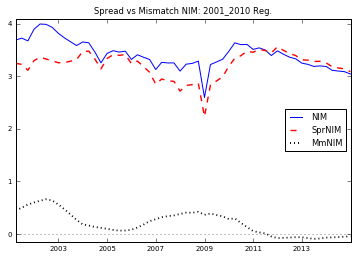

In [87]:
x = list(dn.index)
plt.plot(x,dn['qyNIM'],label='NIM')
plt.plot(x,dn['sNIM'],ls='--',lw=1.4,c='r',label='SprNIM')
plt.plot(x,dn['mNIM'],ls=':',lw=1.8,c='k',label='MmNIM')
plt.plot(x,dn['DDA'],ls=':',lw=.5,c='k',label='_no_legend')  ## omit legend entry!!!!
plt.title('Spread vs Mismatch NIM: '+r0 + ' Reg.')
plt.ylim([-.15,4.1])
plt.legend(loc=0)
plt.savefig('Spr_MmNIM_'+grp+'_'+r0+'.png', dpi=400, bbox_inches='tight')
plt.show()

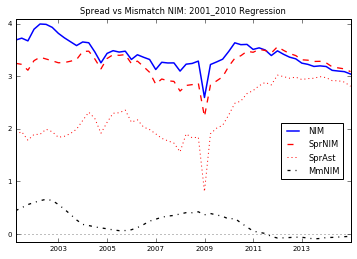

In [92]:
x = list(dn.index)
plt.plot(x,dn['qyNIM'],lw=1.5,label='NIM')
plt.plot(x,dn['sNIM'],ls='--',lw=1.3,c='r',label='SprNIM')
plt.plot(x,dn['sTotII'],ls=':',lw=1,c='r',label='SprAst')
plt.plot(x,dn['mNIM'],ls='-.',lw=1.3,c='k',label='MmNIM')
plt.plot(x,dn['DDA'],ls=':',lw=.5,c='k',label='_no_legend')  ## omit legend entry!!!!
plt.title('Spread vs Mismatch NIM: '+r0+' Regression')
plt.legend(bbox_to_anchor=(.99,.55))
plt.ylim([-.15,4.1])
plt.savefig('Spr_MmNIM2_'+grp+'_'+r0+'.png', dpi=400, bbox_inches='tight')
plt.show()

In [89]:
dn['2001':'2007'][['sNIM','mNIM','qyNIM','cNIM']].mean()

sNIM     3.219694
mNIM     0.317189
qyNIM    3.536883
cNIM     3.536883
dtype: float64

In [90]:
dnorig.to_csv('NIMdata_FDIC_'+grp+'_'+r0+'_sp_mmNIM.csv')
'NIMdata_FDIC_'+grp+'_'+r0+'_sp_mmNIM.csv'

'NIMdata_FDIC_grpTotUSx00_2001_2010_sp_mmNIM.csv'

In [91]:
dn.columns[0:75],dn.columns[75:]

(Index(['Grp', 'nbr', 'eTotAst', 'eTangEq', 'eDDA', 'qyNetII', 'qyTotII',
        'qyTotLn', 'qyRE', 'qyCI', 'qyCard', 'qyOthCsmr', 'qyOthLnLs', 'qyDFIB',
        'qyTreas', 'qyMBS', 'qyOthSec', 'qyFFS', 'qyOAstIB', 'qyTotLnLs',
        'qyTotSec', 'qrTotIE', 'qrNOW', 'qrSav', 'qrCDun', 'qrCDov', 'qrFFP',
        'qrBorr', 'qrOLbIB', 'qrDepIB', 'qrFDepIB', 'qyNIM', 'qyCsmr',
        'qrSavNow', 'qrCD', 'aTotAst', 'aDLn', 'aSFR', 'aRE', 'aTotRE', 'aAg',
        'aCI', 'aCard', 'aOthCsmr', 'aFLn', 'aLeas', 'aTrad', 'aDFIB', 'aTreas',
        'aMBS', 'aOSec', 'aFFS', 'aTotLn', 'aTotLnLs', 'aOthLnLs', 'aTotSec',
        'aOAstIB', 'aEarnAst', 'aNOW', 'aSav', 'aCDun', 'aCDov', 'aDDepIB',
        'aFDepIB', 'aFFP', 'aBorr', 'aDepIB', 'aOLbIB', 'aFF_TA', 'aCsmr',
        'aSavNow', 'aCD', 'rNIM', 'aLnLsPc', 'aAstPc'],
       dtype='object'),
 Index(['aLiabPc', 'netDDA', 'fDDA', 'fPrime', 'fqrCD', 'fqrFDepIB', 'fqrOLbIB',
        'fqrSavNow', 'fqyCI', 'fqyCsmr', 'fqyOAstIB', 'fqyOthLnLs', 'fqy